Load Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [8]:
df=pd.read_csv('./house_train.csv')
test=pd.read_csv('./house_test.csv')
print('train')
print(df.head())
print('test')
print(test.head())


train
   id    zip state         county  poverty  price2007  price2013
0   0  10467    NY          bronx     27.1     335200     294000
1   1  11226    NY          kings     21.9     471500     471600
2   2  60640    IL           cook     14.6     254600     174200
3   3  94109    CA  san francisco     10.6     707100     822600
4   4  11375    NY         queens     12.2     636400     681500
test
   id    zip state      county  poverty  price2007
0   6  32162    FL      marion     13.0     265600
1  13  78572    TX     hidalgo     34.0      79900
2  20  11212    NY       kings     21.9     332000
3  30  37042    TN  montgomery     12.7      98700
4  37  85032    AZ    maricopa     12.9     266100


In [9]:
# df=df.drop(  'price2013', axis='columns' )
df.head()

,id,zip,state,county,poverty,price2007,price2013
0,0,10467,NY,bronx,27.1,335200,294000
1,1,11226,NY,kings,21.9,471500,471600
2,2,60640,IL,cook,14.6,254600,174200
3,3,94109,CA,san francisco,10.6,707100,822600
4,4,11375,NY,queens,12.2,636400,681500


In [10]:
print(df.describe())

                 id           zip      poverty     price2007     price2013
count   8973.000000   8973.000000  8973.000000  8.973000e+03  8.973000e+03
mean    5016.424830  45752.551098    11.438504  2.880939e+05  2.424867e+05
std     2900.023449  31306.650907     4.520784  2.276980e+05  2.176485e+05
min        0.000000   1001.000000    -1.000000  3.400000e+04  3.520000e+04
25%     2505.000000  19026.000000     8.400000  1.397000e+05  1.223000e+05
50%     5023.000000  37324.000000    11.100000  2.230000e+05  1.788000e+05
75%     7528.000000  76085.000000    14.500000  3.627000e+05  2.848000e+05
max    10035.000000  99709.000000    34.000000  3.467800e+06  4.709500e+06


for functions


In [11]:

def map_state(x):
    # if state in top 5 most count, label it else others =6
  if x in state_map:
    return state_map[x]
  else:
    return 11
def map_county(x):
     # if state in top 15 most count, label it else others =16
  if x in county_map:
    return county_map[x]
  else:
    return 16 
def get_top_n_count(target,n):
    return list(df.groupby(target).count()['id'].nlargest(n).reset_index()[target])
def standardize(data,target):
  minmax = preprocessing.MinMaxScaler()
  return minmax.fit_transform(   data[ [target] ] )

get top n count based on the frequency.

I tried to only encode the top n by frequency, but the result is better when I include all the states and counties.
Other than that, I included a 'other' label data in testing data that doesn't appeared in training set. 

In [12]:
top_states=get_top_n_count('state',50)
top_county=get_top_n_count('county',700)

# print(top_states)
# print(top_county)

In [13]:
state_map={}
for x in range(len(top_states)):
  state_map[top_states[x] ]=x


county_map={}
for x in range(len(top_county)):
  county_map[top_county[x] ]=x
state_map['others']=50
county_map['others']=628


print(state_map)
print(county_map)


{'CA': 0, 'FL': 1, 'NY': 2, 'PA': 3, 'OH': 4, 'NJ': 5, 'MA': 6, 'IL': 7, 'NC': 8, 'TX': 9, 'MD': 10, 'MI': 11, 'WA': 12, 'TN': 13, 'CO': 14, 'GA': 15, 'CT': 16, 'VA': 17, 'AZ': 18, 'WI': 19, 'OR': 20, 'MN': 21, 'MO': 22, 'SC': 23, 'OK': 24, 'AL': 25, 'NH': 26, 'IA': 27, 'UT': 28, 'AR': 29, 'NV': 30, 'KY': 31, 'RI': 32, 'IN': 33, 'HI': 34, 'NE': 35, 'DE': 36, 'NM': 37, 'MT': 38, 'AK': 39, 'DC': 40, 'WV': 41, 'LA': 42, 'KS': 43, 'WY': 44, 'ND': 45, 'others': 50}
{'los angeles': 0, 'orange': 1, 'montgomery': 2, 'middlesex': 3, 'suffolk': 4, 'washington': 5, 'maricopa': 6, 'jefferson': 7, 'san diego': 8, 'franklin': 9, 'monroe': 10, 'worcester': 11, 'king': 12, 'allegheny': 13, 'nassau': 14, 'jackson': 15, 'erie': 16, 'miami-dade': 17, 'cook': 18, 'oakland': 19, 'hillsborough': 20, 'westchester': 21, 'lake': 22, 'bergen': 23, 'clark': 24, 'marion': 25, 'hamilton': 26, 'polk': 27, 'hennepin': 28, 'fairfield': 29, 'kent': 30, 'riverside': 31, 'broward': 32, 'santa clara': 33, 'palm beach': 3

In [14]:
df['state_label']=df['state'].apply(map_state)
df['county_label']=df['county'].apply(map_county)


Use label encoding for state and store in state_label.

In [15]:
test['state_label']=test['state'].apply(map_state)
test['county_label']=test['county'].apply(map_county)
test.head()

,id,zip,state,county,poverty,price2007,state_label,county_label
0,6,32162,FL,marion,13.0,265600,1,25
1,13,78572,TX,hidalgo,34.0,79900,9,208
2,20,11212,NY,kings,21.9,332000,2,164
3,30,37042,TN,montgomery,12.7,98700,13,2
4,37,85032,AZ,maricopa,12.9,266100,18,6


Stadardize the data.

In [16]:
df['poverty_std']=standardize(df,'poverty')
test['poverty_std']=standardize(test,'poverty')

df['zip_std']=standardize(df,'zip')
test['zip_std']=standardize(test,'zip')

df['price2007_std']=standardize(df,'price2007')
test['price2007_std']=standardize(test,'price2007')

# df['state_label']=standardize(df,'state_label')
# test['state_label']=standardize(test,'state_label')

# df['county_label']=standardize(df,'county_label')
# test['county_label']=standardize(test,'county_label')

print(df.head())
# print(test.head())


   id    zip state         county  poverty  price2007  price2013  state_label  \
0   0  10467    NY          bronx     27.1     335200     294000            2   
1   1  11226    NY          kings     21.9     471500     471600            2   
2   2  60640    IL           cook     14.6     254600     174200            7   
3   3  94109    CA  san francisco     10.6     707100     822600            0   
4   4  11375    NY         queens     12.2     636400     681500            2   

   county_label  poverty_std   zip_std  price2007_std  
0           272     0.802857  0.095899       0.087716  
1           164     0.654286  0.103588       0.127410  
2            18     0.445714  0.604196       0.064244  
3           153     0.331429  0.943267       0.196022  
4            64     0.377143  0.105098       0.175432  


show correlation

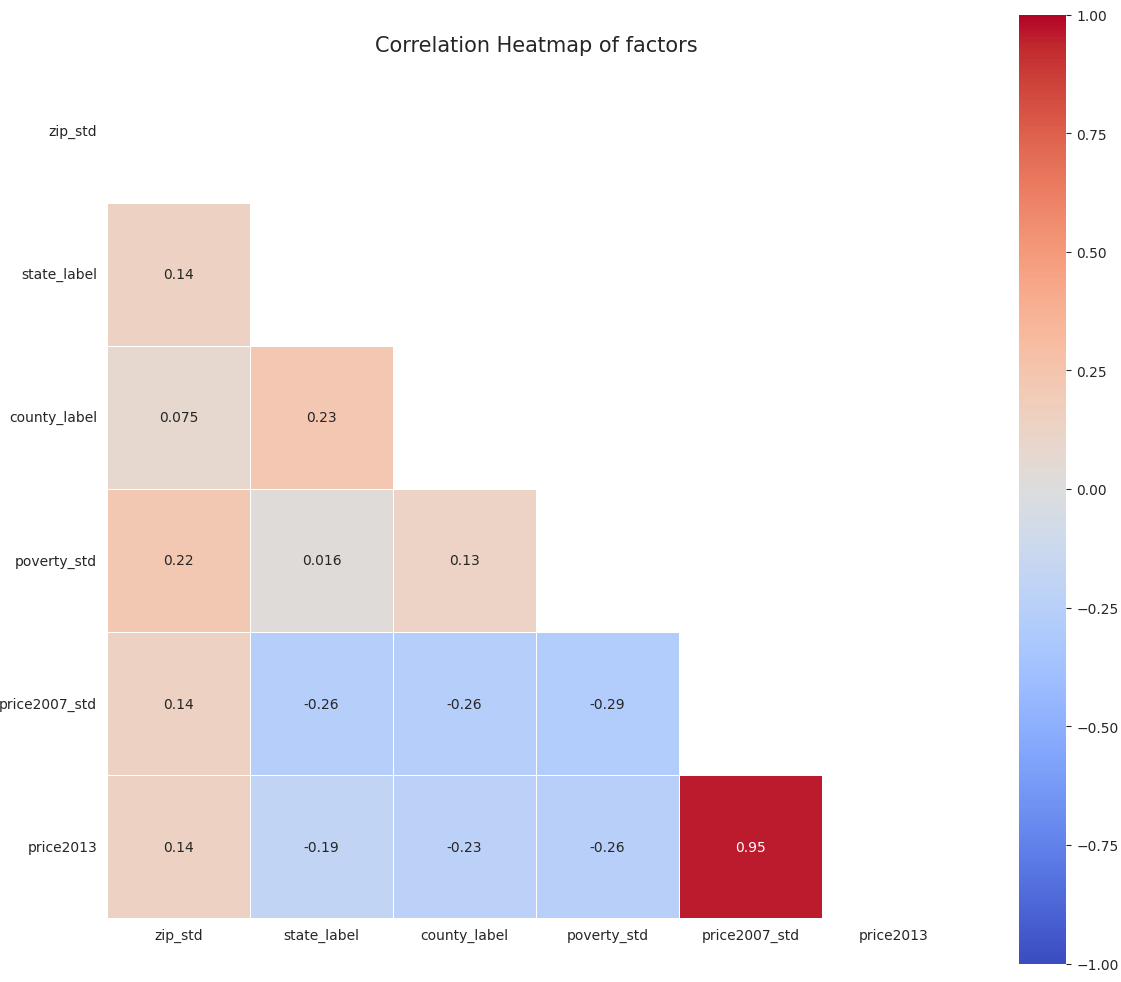

In [17]:
df_corr = df[   ['zip_std','state_label','county_label','poverty_std','price2007_std','price2013']  ].corr()
# print(df_corr)
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of factors', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

In [18]:


x=df[ ['poverty_std','county_label','price2007_std']  ]
y = df['price2013']


print(  x.shape  )
print(  y.shape  )

(8973, 3)
(8973,)


In [19]:


# test_y=test['price2007']
test_x=test[ ['poverty_std','county_label','price2007_std']   ]

id=test['id']

# print(  test_x.head()   )

# print(  test_y.head()   )
# print(id)

In [20]:
def train_model(model,x,y):
    print('model=',model)
    model.fit(x,y)
    pre=model.predict(test_x)
    output = pd.DataFrame({
                        "id":id,
                        "prediction": pre
                        })
    output.to_csv('submission'+str(model)+'.csv', index=False, header = 1)
    print("Your submission for ",str(model),"was successfully saved!")
    

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

train_model(LinearRegression(),x,y)
# train_model(tree.DecisionTreeClassifier(),x,y)
# train_model(RandomForestClassifier(n_estimators=30),x,y)

# # model.fit(x,y)


model= LinearRegression()
Your submission for  LinearRegression() was successfully saved!


In [22]:
# from sklearn.svm import SVC
# train_model(SVC(),x,y)

In [23]:
# from sklearn.svm import SVR
# train_model(SVR(),x,y)

In [24]:
# from sklearn.linear_model import SGDRegressor
# train_model(SGDRegressor(),x,y)

In [25]:
# from sklearn.linear_model import LogisticRegression
# train_model(LogisticRegression(),x,y)